# Plot landuse pathways

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
import string

import dotenv
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import seaborn as sns
from matplotlib.gridspec import GridSpec

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.handleheight"] = 0.8
plt.rcParams["legend.handlelength"] = 2

<IPython.core.display.Javascript object>

In [5]:
DATA_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "pathways",
    "co2-uptake-pathways_{}.nc".format(utils.UPTAKE_PATHWAYS_ID),
)
DATA_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/pathways/co2-uptake-pathways_7d7c42.nc'

<IPython.core.display.Javascript object>

In [6]:
OUT_FILE = os.path.join(utils.DATA_DIR, "processed", "summary", "land-use-pathways.csv")
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)

<IPython.core.display.Javascript object>

In [7]:
OUT_FILE_FIGURE = os.path.join(utils.FIGURES_DIR, "global-removal-pathways.pdf")
os.makedirs(os.path.dirname(OUT_FILE_FIGURE), exist_ok=True)

<IPython.core.display.Javascript object>

In [8]:
OUT_FILE_STATS = os.path.join(
    utils.DATA_DIR, "processed", "summary", "land-use-pathways-stats.csv"
)

<IPython.core.display.Javascript object>

In [9]:
landuse_pathways = scmdata.ScmRun.from_nc(DATA_FILE)
landuse_pathways

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<ScmRun (timeseries: 63000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model     region             scenario      unit  \
	0                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	1                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	2                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	3                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	4                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	...                ...        ...        ...                  ...       ...   
	62995             2999  One Earth      World  Climate restoration  GtC / yr   
	62996             2999  One Earth      World  Climate restoration  GtC / yr   
	62997             2999  One Earth      World  Climate restoration  GtC / yr   
	62998             2999  One Earth      World  Climate restoration  GtC / yr   
	62999  

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


(-0.5, 1.0)

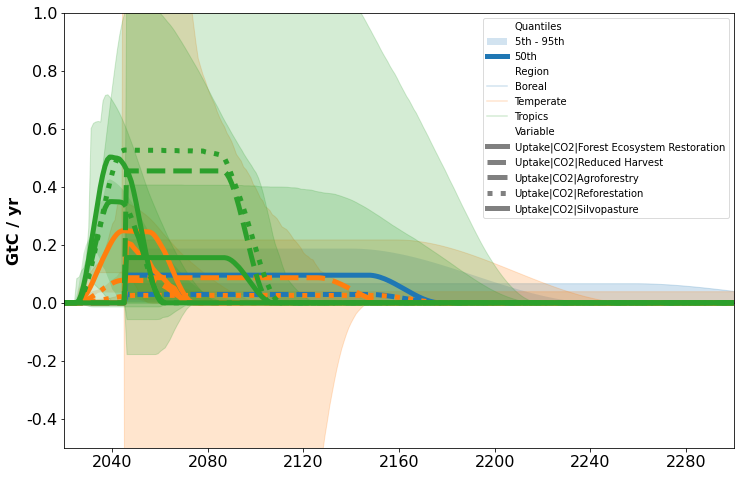

<IPython.core.display.Javascript object>

In [10]:
pdf = landuse_pathways.filter(region="World", keep=False).filter(
    variable="Uptake|CO2", keep=False
)
pdf["pathway"] = (
    pdf["variable"].apply(lambda x: x.split("|")[-1]) + " - " + pdf["region"]
)

# ax, _ = pdf.plumeplot(hue_var="variable", style_var="region")
ax, _ = pdf.plumeplot(
    hue_var="region",
    hue_label="Region",
    style_var="variable",
    style_label="Variable",
    quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
    linewidth=5,
)

ax.set_ylim([-0.5, 1])

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

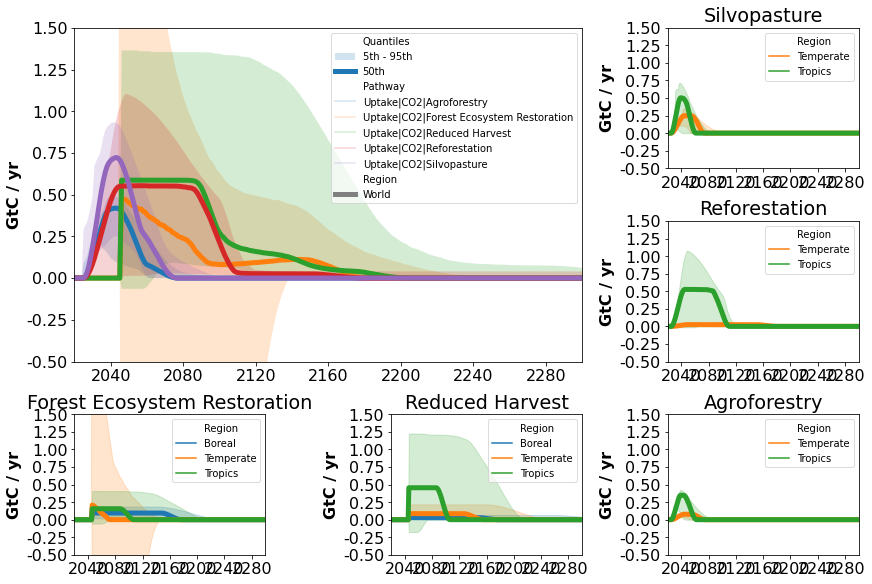

<IPython.core.display.Javascript object>

In [11]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(3, 3, figure=fig)

ylim = [-0.5, 1.5]
# ylim = [-2, 3]
# ylim = [-1, 2]

ax0 = fig.add_subplot(gs[:2, :2])
pdf = landuse_pathways.filter(region="World").filter(variable="Uptake|CO2", keep=False)
quantiles_plumes = [((0.05, 0.95), 0.2), ((0.5,), 1.0)]
# quantiles_plumes = [((0.17, 0.83), 0.5), ((0.5,), 1.0)]
# quantiles_plumes = [((0.05, 0.95), 0.2), ((0.17, 0.83), 0.5), ((0.5,), 1.0)]

pdf.plumeplot(
    hue_var="variable",
    hue_label="Pathway",
    style_var="region",
    style_label="Region",
    quantiles_plumes=quantiles_plumes,
    linewidth=5,
    ax=ax0,
)

ax0.set_ylim(ylim)


palette = {
    "Boreal": "tab:blue",
    "Tropics": "tab:green",
    "Temperate": "tab:orange",
}
pdf = landuse_pathways.filter(region="World", keep=False).filter(
    variable="Uptake|CO2", keep=False
)

for variable, ax in (
    ("Forest Ecosystem Restoration", fig.add_subplot(gs[2, 0], sharey=ax0)),
    ("Reduced Harvest", fig.add_subplot(gs[2, 1], sharey=ax0)),
    ("Agroforestry", fig.add_subplot(gs[2, 2], sharey=ax0)),
    ("Reforestation", fig.add_subplot(gs[1, 2], sharey=ax0)),
    ("Silvopasture", fig.add_subplot(gs[0, 2], sharey=ax0)),
):
    ax, lh = pdf.filter(variable=f"*{variable}").plumeplot(
        hue_var="region",
        hue_label="Region",
        palette=palette,
        style_var="variable",
        style_label="Variable",
        quantiles_plumes=quantiles_plumes,
        linewidth=5,
        ax=ax,
    )
    #     pdf.filter(variable=f"*{variable}", ensemble_member=range(200)).lineplot(
    #         units="ensemble_member",
    #         estimator=None,
    #         hue="region",
    #         palette=palette,
    #         linewidth=0.25,
    #         ax=ax,
    #     )
    legend_items = []
    append = False
    for li in lh:
        if li.get_label() == "Region":
            legend_items.append(li)
            append = True
        elif li.get_label() == "Variable":
            append = False
        elif append:
            legend_items.append(li)

    ax.legend(handles=legend_items, loc="best")
    ax.set_title(variable)

In [12]:
pdf = landuse_pathways.filter(region="World", keep=False).filter(
    variable="Uptake|CO2", keep=False
)
pdf["pathway"] = (
    pdf["variable"].apply(lambda x: x.split("|")[-1]) + " - " + pdf["region"]
)

q_lower = 0.05
q_upper = 0.95
end_average_period = range(2081, 2100 + 1)
ylim = [-0.5, 1.5]

fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 4, figure=fig)
ax0 = fig.add_subplot(gs[0, :3])
ax1 = fig.add_subplot(gs[0, 3], sharey=ax0)

palette = {
    "Forest Ecosystem Restoration - Boreal": "tab:blue",
    "Reduced Harvest - Boreal": "tab:red",
    "Agroforestry - Temperate": "tab:green",
    "Forest Ecosystem Restoration - Temperate": "tab:purple",
    "Reduced Harvest - Temperate": "tab:gray",
    "Reforestation - Temperate": "tab:pink",
    "Silvopasture - Temperate": "magenta",
    "Agroforestry - Tropics": "lime",
    "Forest Ecosystem Restoration - Tropics": "tab:cyan",
    "Reduced Harvest - Tropics": "aqua",
    "Reforestation - Tropics": "yellow",
    "Silvopasture - Tropics": "tab:orange",
}

# ax, _ = pdf.plumeplot(hue_var="variable", style_var="region")
# ax, _ = pdf.plumeplot(
#     hue_var="region",
#     hue_label="Region",
#     style_var="variable",
#     style_label="Variable",
#     quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
#     linewidth=5,
# )
median = pdf.process_over("ensemble_member", "median")
ax = scmdata.ScmRun(median).lineplot(
    hue="pathway",
    linewidth=3,
    palette=palette,
    ax=ax0,
)
ax.set_ylim(ylim)

end_averages = (
    pdf.filter(year=end_average_period).timeseries().mean(axis=1).groupby("pathway")
)
median_box = end_averages.median()
lower_box = end_averages.quantile(q=q_lower)
upper_box = end_averages.quantile(q=q_upper)
value_label = "{} - {} mean".format(end_average_period[0], end_average_period[-1])

box_df = []
for i in range(101):
    if i < 50:
        to_append = lower_box.copy()
    elif i == 50:
        to_append = median_box.copy()
    else:
        to_append = upper_box.copy()

    to_append = to_append.to_frame().rename({0: value_label}, axis="columns")
    to_append["draw"] = i

    box_df.append(to_append)

box_df = pd.concat(box_df, axis=0).reset_index()

ax1 = sns.boxplot(data=box_df, x="pathway", y=value_label, palette=palette, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

[Text(0, 0, 'Agroforestry - Temperate'),
 Text(0, 0, 'Agroforestry - Tropics'),
 Text(0, 0, 'Forest Ecosystem Restoration - Boreal'),
 Text(0, 0, 'Forest Ecosystem Restoration - Temperate'),
 Text(0, 0, 'Forest Ecosystem Restoration - Tropics'),
 Text(0, 0, 'Reduced Harvest - Boreal'),
 Text(0, 0, 'Reduced Harvest - Temperate'),
 Text(0, 0, 'Reduced Harvest - Tropics'),
 Text(0, 0, 'Reforestation - Temperate'),
 Text(0, 0, 'Reforestation - Tropics'),
 Text(0, 0, 'Silvopasture - Temperate'),
 Text(0, 0, 'Silvopasture - Tropics')]

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

(-0.5, 1.5)

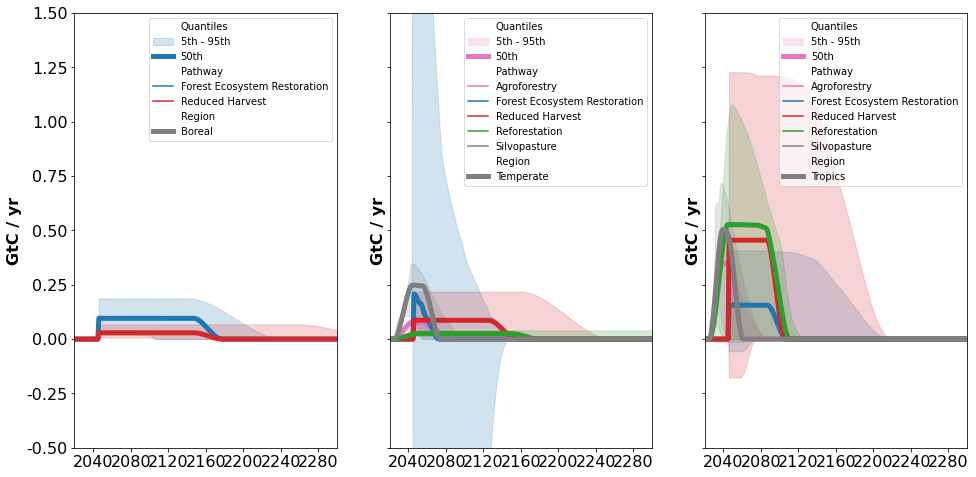

<IPython.core.display.Javascript object>

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(16, 8))
ylim = [-0.5, 1.5]
palette = {
    "Forest Ecosystem Restoration": "tab:blue",
    "Reduced Harvest": "tab:red",
    "Agroforestry": "tab:pink",
    "Reforestation": "tab:green",
    "Silvopasture": "tab:gray",
}

pdf = landuse_pathways.filter(region="World", keep=False).filter(
    variable="Uptake|CO2", keep=False
)
pdf["variable"] = pdf["variable"].apply(lambda x: x.split("|")[-1])

for region, ax in (
    ("Boreal", axes[0]),
    ("Temperate", axes[1]),
    ("Tropics", axes[2]),
):
    pdf.filter(region=region).plumeplot(
        hue_var="variable",
        hue_label="Pathway",
        palette=palette,
        style_var="region",
        style_label="Region",
        quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
        linewidth=5,
        ax=ax,
    )

axes[0].set_ylim(ylim)

In [14]:
pdf

<ScmRun (timeseries: 36000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model     region             scenario      unit  \
	1                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	2                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	4                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	5                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	6                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	...                ...        ...        ...                  ...       ...   
	62989             2999  One Earth    Tropics  Climate restoration  GtC / yr   
	62990             2999  One Earth    Tropics  Climate restoration  GtC / yr   
	62991             2999  One Earth    Tropics  Climate restoration  GtC / yr   
	62992             2999  One Earth    Tropics  Climate restoration  GtC / yr   
	62993  

<IPython.core.display.Javascript object>

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../figures/global-removal-pathways.pdf'

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/summary/land-use-pathways.csv'

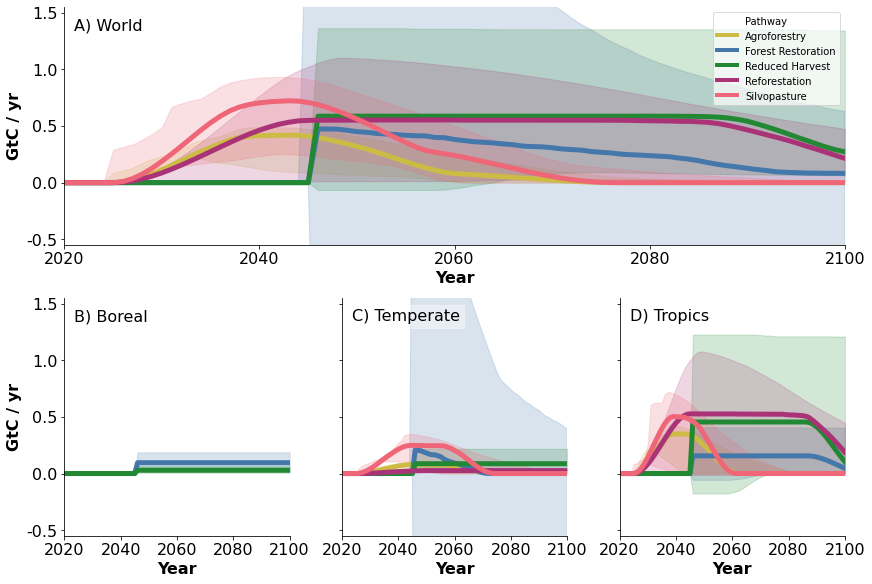

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = GridSpec(2, 3, figure=fig)

ylim = [-0.55, 1.55]
# ylim = [-0.5, 2.0]
# ylim = [-2, 3]
# ylim = [-1, 2]

plt_years = range(2000, 2100 + 1)

pdf = scmdata.ScmRun(
    landuse_pathways.filter(variable="Uptake|CO2", keep=False).filter(year=plt_years)
)
pdf["variable"] = pdf["variable"].apply(lambda x: x.split("|")[-1])
pdf["variable"] = pdf["variable"].str.replace("Ecosystem ", "")

pdfq = scmdata.ScmRun(
    pdf.quantiles_over("ensemble_member", (0.05, 0.17, 0.83, 0.5, 0.95))
)

quantiles_plumes = [((0.05, 0.95), 0.2), ((0.5,), 1.0)]
# quantiles_plumes = [((0.17, 0.83), 0.5), ((0.5,), 1.0)]
# quantiles_plumes = [((0.05, 0.95), 0.2), ((0.17, 0.83), 0.5), ((0.5,), 1.0)]

# Thanks https://personal.sron.nl/~pault/#sec:qualitative for palette
palette = {
    "Forest Restoration": "#4477AA",
    "Reduced Harvest": "#228833",
    "Agroforestry": "#CCBB44",
    "Reforestation": "#AA3377",
    "Silvopasture": "#EE6677",
}


for i, (region, ax) in enumerate(
    (
        ("World", fig.add_subplot(gs[0, :])),
        ("Boreal", fig.add_subplot(gs[1, 0])),
        ("Temperate", fig.add_subplot(gs[1, 1])),
        ("Tropics", fig.add_subplot(gs[1, 2])),
    )
):
    hue = "variable"
    #     ax = pdf.filter(region=region, ensemble_member=range(0, 3000, 5)).lineplot(
    #         hue=hue,
    #         units="ensemble_member",
    #         estimator=None,
    #         palette=palette,
    #         time_axis="year",
    #         linewidth=0.25,
    #         alpha=0.5,
    #         ax=ax,
    #         zorder=1.5,
    #     )
    ax, lh = pdfq.filter(region=region).plumeplot(
        hue_var=hue,
        hue_label="Pathway",
        palette=palette,
        style_var="region",
        style_label="Region",
        quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
        linewidth=5,
        ax=ax,
        pre_calculated=True,
        time_axis="year",
    )
    ax.set_ylim(ylim)
    #     ax.axhline(0, color="black", zorder=1.2)

    if i > 0:
        ax.legend().remove()
    else:
        leg = ax.legend(
            handles=lh[3:-2],
            #                   loc="upper right"
        )
        utils.set_legend_linewidths(leg, 4)

    if i > 1:
        ax.set_ylabel("")
        #         ax.set_yticks([])
        ax.set_yticklabels([])

    ax.set_xticks(range(2020, 2100 + 1, 20))

    utils.annotate_ax(
        ax,
        f"{string.ascii_uppercase[i]}) {region}",
        (10, 215),
        "axes points",
    )

    ax.set_xlabel("Year")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

# plt.tight_layout()
plt.savefig(OUT_FILE_FIGURE, transparent=True)
display(OUT_FILE_FIGURE)
pdfq.to_csv(OUT_FILE)
display(OUT_FILE)

In [16]:
pdfq.timeseries(
    meta=["model", "scenario", "region", "variable", "quantile", "unit"]
).sort_index()

time                                                                       2020-01-01  \
model     scenario            region variable           quantile unit                   
One Earth Climate restoration Boreal Forest Restoration 0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   
...                                                                               ...   
                              World  Silvopasture       0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   

time                                                                       2021-01-01  \
model     scenario            region variable           quantile unit                   
One Earth Climate restoration Boreal Forest Restoration 0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   
...                                                                               ...   
                              World  Silvopasture       0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   

time                                                                       2022-01-01  \
model     scenario            region variable           quantile unit                   
One Earth Climate restoration Boreal Forest Restoration 0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   
...                                                                               ...   
                              World  Silvopasture       0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr         0.0   
                                                        0.95     GtC / yr         0.0   

time                                                                       2023-01-01  \
model     scenario            region variable           quantile unit                   
One Earth Climate restoration Boreal Forest Restoration 0.05     GtC / yr         0.0   
                                                        0.17     GtC / yr         0.0   
                                                        0.50     GtC / yr         0.0   
                                                        0.83     GtC / yr        

<IPython.core.display.Javascript object>

In [17]:
stats_scmrun = landuse_pathways.filter(year=range(1, 2100 + 1))


stats_scmrun["Climatic domain"] = stats_scmrun["region"]
stats_scmrun["Pathway"] = stats_scmrun["variable"].apply(lambda x: x.split("|")[-1])
stats_scmrun["Pathway"] = stats_scmrun["Pathway"].apply(
    lambda x: "All" if x == "CO2" else x
)


def add_statistic(idf, stat_name):
    out = idf.copy()
    out.columns.name = "Percentile"
    out = out.reset_index("unit")
    out["Statistic"] = "{} (".format(stat_name) + out["unit"] + ")"
    out = out.drop("unit", axis="columns")
    out = (
        out.set_index("Statistic", append=True).unstack("Statistic").swaplevel(0, 1, 1)
    )

    return out


def group_and_describe(ins):
    return ins.groupby(["Pathway", "Climatic domain", "unit"]).describe(
        percentiles=[0.05, 0.17, 0.5, 0.83, 0.95]
    )[["5%", "50%", "95%"]]


peak_uptake = group_and_describe(stats_scmrun.timeseries().max(axis=1))
peak_uptake = add_statistic(peak_uptake, "Peak uptake")

uptake_year = 2100
cumulative_uptake = group_and_describe(
    stats_scmrun.integrate()
    .convert_unit("GtC")
    .filter(year=uptake_year)
    .timeseries(time_axis="year")[uptake_year]
)
cumulative_uptake = add_statistic(
    cumulative_uptake, "Cumulative uptake to {}".format(uptake_year)
)


stats = (
    pd.concat([peak_uptake, cumulative_uptake], axis=1)
    .reindex(
        [
            "All",
            "Agroforestry",
            "Forest Ecosystem Restoration",
            "Reduced Harvest",
            "Reforestation",
            "Silvopasture",
        ],
        axis=0,
        level=0,
    )
    .reindex(
        [
            "World",
            "Boreal",
            "Tropics",
            "Temperate",
        ],
        axis=0,
        level=1,
    )
)

out = stats.round(2)
out.to_csv(OUT_FILE_STATS)
out

Statistic                                    Peak uptake (GtC / yr)        \
Percentile                                                       5%   50%   
Pathway                      Climatic domain                                
All                          World                             1.18  2.60   
                             Boreal                            0.05  0.13   
                             Tropics                           0.95  1.85   
                             Temperate                         0.24  0.65   
Agroforestry                 World                             0.23  0.43   
                             Tropics                           0.21  0.35   
                             Temperate                         0.04  0.08   
Forest Ecosystem Restoration World                             0.00  0.50   
                             Boreal                            0.02  0.10   
                             Tropics                           0.00  0.16   
                             Temperate                         0.00  0.21   
Reduced Harvest              World                             0.10  0.59   
                             Boreal                            0.01  0.03   
                             Tropics                           0.00  0.45   
                             Temperate                         0.03  0.09   
Reforestation                World                             0.03  0.56   
                             Tropics                           0.00  0.53   
                             Temperate                         0.01  0.03   
Silvopasture                 World                             0.30  0.74   
                             Tropics                           0.14  0.51   
                             Temperate                         0.11  0.25   

Statistic                                           \
Percentile                                     95%   
Pathway                      Climatic domain         
All                          World            5.54   
                             Boreal           0.23   
                             Tropics          2.80   
                             Temperate        3.40   
Agroforestry                 World            0.50   
                             Tropics          0.44   
                             Temperate        0.11   
Forest Ecosystem Restoration World            3.25   
                             Boreal           0.19   
                             Tropics          0.41   
                             Temperate        3.03   
Reduced Harvest              World            1.36   
                             Boreal           0.07   
                             Tropics          1.23   
                             Temperate        0.22   
Reforestation                World            1.14   
                             Tropics          1.12   
                             Temperate        0.04   
Silvopasture                 World            0.94   
                             Tropics          0.76   
                             Temperate        0.37   

Statistic                                    Cumulative uptake to 2100 (GtC)  \
Percentile                                                                5%   
Pathway                      Climatic domain                                   
All                          World                                    -91.52   
                             Boreal                                     2.63   
                             Tropics                                   32.98   
                             Temperate                               -179.70   
Agroforestry                 World                                      4.51   
                             Tropics                                    2.22   
                             Temperate                                  0.82   
Forest Ecosystem Restoration World                    

<IPython.core.display.Javascript object>

(<matplotlib.axes._subplots.AxesSubplot at 0x7efb935ae510>,
  <matplotlib.lines.Line2D at 0x7efb9119cbd0>])

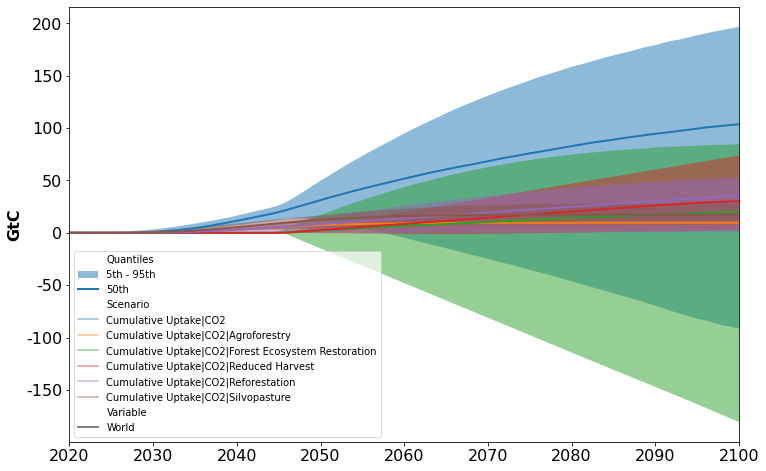

<IPython.core.display.Javascript object>

In [18]:
(stats_scmrun.filter(region="World").integrate().convert_unit("GtC")).plumeplot(
    hue_var="variable", style_var="region"
)

In [19]:
# fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(16, 16))
# ylim = [-0.5, 1.5]
# palette = {
#     "Boreal": "tab:blue",
#     "Tropics": "tab:green",
#     "Temperate": "tab:orange",
# }
# pdf = landuse_pathways.filter(region="World", keep=False).filter(
#     variable="Uptake|CO2", keep=False
# )

# for variable, ax in (
#     ("*Forest Ecosystem Restoration", axes[0][0]),
#     ("*Reduced Harvest", axes[0][1]),
#     ("*Agroforestry", axes[0][2]),
#     ("*Reforestation", axes[1][0]),
#     ("*Silvopasture", axes[1][1]),
# ):
#     pdf.filter(variable=variable).plumeplot(
#         hue_var="region",
#         hue_label="Region",
#         palette=palette,
#         style_var="variable",
#         style_label="Variable",
#         quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
#         linewidth=5,
#         ax=ax,
#     )

# axes[0][0].set_ylim(ylim)

<IPython.core.display.Javascript object>